In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import gc
import os 
import fpfs
import fitsio
import galsim
import logging
import matplotlib.pylab as plt
from astropy.visualization import simple_norm
from mpl_toolkits.axes_grid1 import ImageGrid

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

In [47]:
nshow = 128
nbeg1  = 350
nbeg2 = 380
outDir='galaxy_cosmo170'
psfInt = galsim.Moffat(
    beta=3.5, fwhm=0.7, trunc=0.7 * 4.0
).shear(e1=0.02, e2=-0.02)
a=fpfs.simutil.make_cosmo_sim(outDir,gname = 'g1-0000', scale = 0.2,
                              ind0=23,ny=1024,nx=1024,psf_obj = psfInt,
                              do_write=False,return_array=True
                             )
print(a.shape)
a=a[nbeg1:nbeg1+nshow, nbeg2:nbeg2+nshow]


nshow = 128*2
nbeg1  = 350*2
nbeg2 = 380*2
psfInt = galsim.Moffat(
    beta=3.5, fwhm=0.2, trunc=0.2 * 4.0
).shear(e1=0.02, e2=-0.02)
b=fpfs.simutil.make_cosmo_sim(outDir,gname = 'g1-0000', scale = 0.1,
                              ind0=23,ny=1024*2,nx=1024*2,psf_obj = psfInt,
                              do_write=False,return_array=True
                             )
print(a.shape)
b=b[nbeg1:nbeg1+nshow, nbeg2:nbeg2+nshow]

2023/03/08 02:55:46 ---  We have 1312 galaxies in total, and each 4 are the same
2023/03/08 02:56:13 ---  We have 1312 galaxies in total, and each 4 are the same


(1024, 1024)
(128, 128)


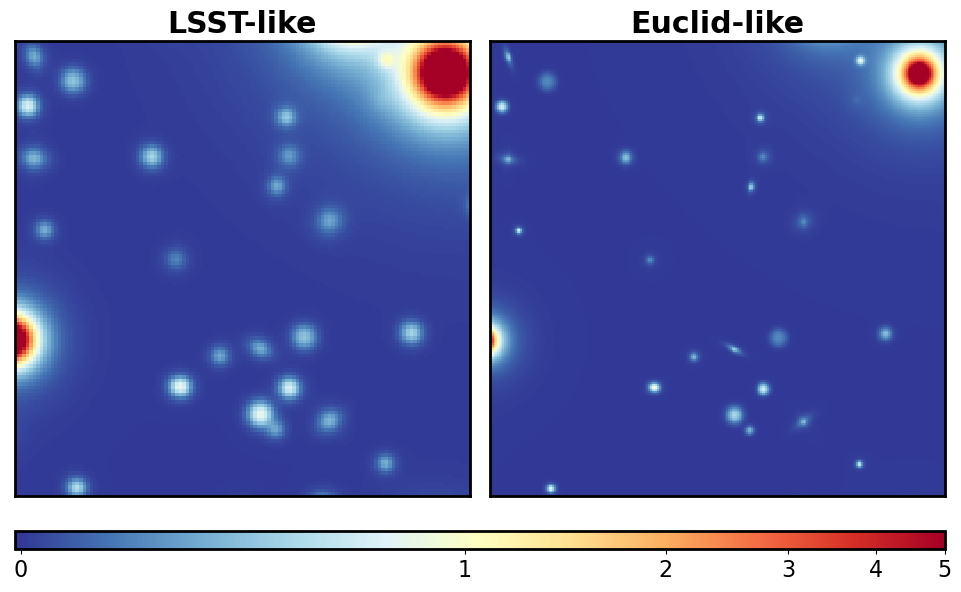

In [51]:
plt.close()

fig=plt.figure(figsize=(12,7))
grid = ImageGrid(fig, 111,     
                 nrows_ncols=(1,2),
                 axes_pad=0.2,
                 share_all=True,
                 cbar_location="bottom",
                 cbar_mode="single",
                 cbar_size="2%",
                 cbar_pad=0.15,
                 )

ax=grid[0]
im=ax.imshow(a,origin='lower',aspect='equal',cmap='RdYlBu_r',interpolation='None',\
             norm=simple_norm(a,'asinh',asinh_a=0.1,min_cut=-0.01,max_cut=5.), extent = (0,100, 0, 100))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('LSST-like', weight = 'bold')

ax=grid[1]
im=ax.imshow(b,origin='lower',aspect='equal',cmap='RdYlBu_r',interpolation='None',\
             norm=simple_norm(a,'asinh',asinh_a=0.1,min_cut=-0.01,max_cut=5.) , extent = (0,100, 0, 100))

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Euclid-like', weight = 'bold')

ax.cax.colorbar(im)

2023/03/08 02:23:24 ---  We have 232 galaxies in total, and each 4 are the same


(512, 512)


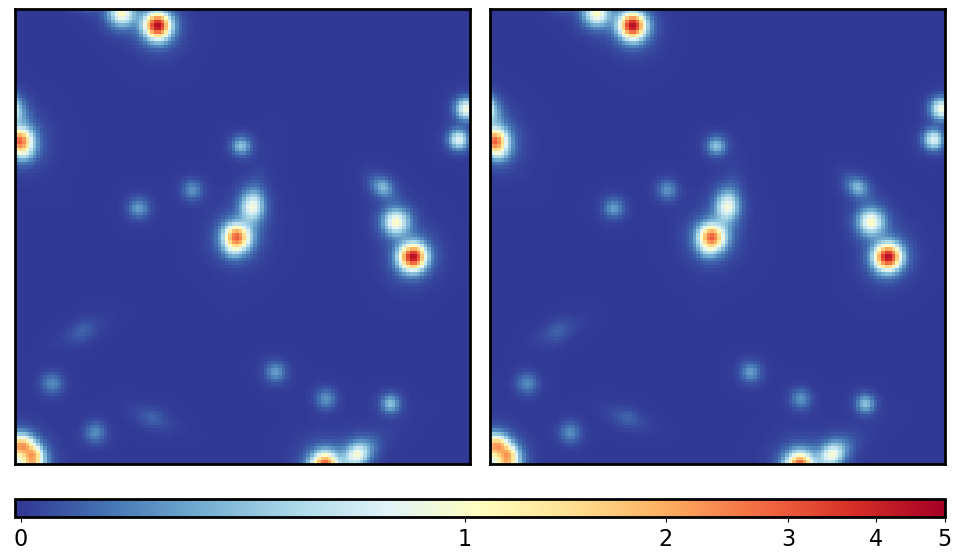

In [24]:
nshow = 128
nbeg  = 256
outDir='galaxy_cosmo170'
psfInt = galsim.Moffat(
    beta=3.5, fwhm=0.6, trunc=0.6 * 4.0
).shear(e1=0.02, e2=-0.02)
a=fpfs.simutil.make_cosmo_sim(outDir,gname = 'g1-0000',
                              ind0=23,ny=512,nx=512,psf_obj = psfInt,
                              do_write=False,return_array=True
                             )
print(a.shape)
a=a[nbeg:nbeg+nshow, nbeg:nbeg+nshow]

plt.close()

fig=plt.figure(figsize=(12,7))
grid = ImageGrid(fig, 111,     
                 nrows_ncols=(1,2),
                 axes_pad=0.2,
                 share_all=True,
                 cbar_location="bottom",
                 cbar_mode="single",
                 cbar_size="2%",
                 cbar_pad=0.15,
                 )

ax=grid[0]
im=ax.imshow(a,origin='lower',aspect='equal',cmap='RdYlBu_r',interpolation='None',\
             norm=simple_norm(a,'asinh',asinh_a=0.1,min_cut=-0.01,max_cut=5.))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])

ax=grid[1]
im=ax.imshow(a,origin='lower',aspect='equal',cmap='RdYlBu_r',interpolation='None',\
             norm=simple_norm(a,'asinh',asinh_a=0.1,min_cut=-0.01,max_cut=5.))

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])

ax.cax.colorbar(im)